# Tarea 4

**Nombre:** Luis Angel Tórtola  
**Carnet:** 25007713

---


Ejemplo 1:
Forward pass: 9.00000000000000
Gradiente respecto a x: 4.00000000000000
Gradiente respecto a y: 4.00000000000000
Gradiente respecto a z: 2.00000000000000


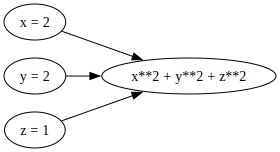

--------------------------------------------------------------------------------

Ejemplo 2:
Forward pass: 2.3026
Gradiente respecto a x: 1.00000000000000
Gradiente respecto a y: 2.00000000000000
Gradiente respecto a z: 0.6000


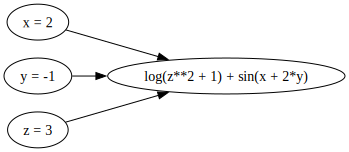

--------------------------------------------------------------------------------

Ejemplo 3:
Forward pass: 9.00000000000000
Gradiente respecto a x: 24.0000000000000
Gradiente respecto a y: 6.5452
Gradiente respecto a z: 7.3891


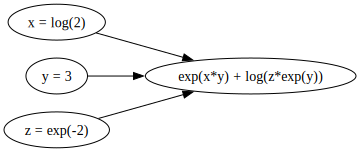

--------------------------------------------------------------------------------

Ejemplo 4:
Forward pass: 36.0000000000000
Gradiente respecto a x: 12.0000000000000
Gradiente respecto a y: -6.00000000000000
Gradiente respecto a z: 30.0000000000000


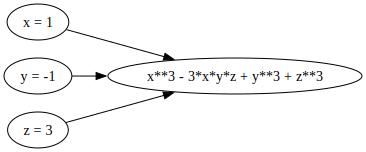

--------------------------------------------------------------------------------

Ejemplo 5:
Forward pass: 0.1039
Gradiente respecto a x: -2.8538
Gradiente respecto a y: 0.1619
Gradiente respecto a z: -0.5299


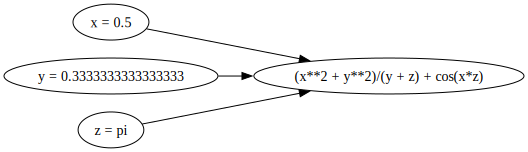

--------------------------------------------------------------------------------

Ejemplo 6:
Forward pass: 3.8785
Gradiente respecto a x: 9.5122
Gradiente respecto a y: 0.1839
Gradiente respecto a z: -7.7569


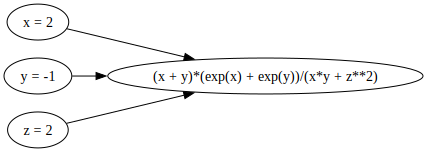

--------------------------------------------------------------------------------


In [8]:
from graphviz import Digraph
import sympy as sp


x, y, z = sp.symbols('x y z')


def evaluate_function(expression, values):
    # Forward pass
    forward_pass = expression.subs(values)
    
    # Backward pass
    grad_x = sp.diff(expression, x).subs(values)
    grad_y = sp.diff(expression, y).subs(values)
    grad_z = sp.diff(expression, z).subs(values)
    
    return forward_pass, grad_x, grad_y, grad_z


def create_evaluation_graph(expression, values):
    graph = Digraph()
    graph.attr(rankdir='LR')
    
    for var in values:
        graph.node(str(var), f'{var} = {values[var]}')
    
    graph.node('expression', label=str(expression))
    
    for var in values:
        graph.edge(str(var), 'expression')
    
    return graph


functions = [
    x**2 + y**2 + z**2,
    sp.sin(x + 2*y) + sp.log(z**2 + 1),
    sp.exp(x*y) + sp.log(z * sp.exp(y)),
    x**3 + y**3 + z**3 - 3*x*y*z,
    (x**2 + y**2) / (y + z) + sp.cos(x*z),
    ((x+y) * (sp.exp(x) + sp.exp(y))) / ((x*y) + z**2)
]

values_list = [
    {x: 2, y: 2, z: 1},
    {x: 2, y: -1, z: 3},
    {x: sp.log(2), y: 3, z: sp.exp(-2)},
    {x: 1, y: -1, z: 3},
    {x: 1/2, y: 1/3, z: sp.pi},
    {x: 2, y: -1, z: 2}
]

for i, (func, values) in enumerate(zip(functions, values_list)):
    print(f'\nEjemplo {i+1}:')
    forward, grad_x, grad_y, grad_z = evaluate_function(func, values)
    print(f'Forward pass: {round(forward.evalf(), 4)}')
    print(f'Gradiente respecto a x: {round(grad_x.evalf(), 4)}')
    print(f'Gradiente respecto a y: {round(grad_y.evalf(), 4)}')
    print(f'Gradiente respecto a z: {round(grad_z.evalf(), 4)}')
    
    graph = create_evaluation_graph(func, values)
    # graph.render(f'function_{i+1}', format='png', cleanup=True) # Guardar imagen local
    display(graph) 
    print('-' * 80)